In [3]:
import numpy as np
import tensorflow as tf
import os
import cv2
%matplotlib inline 
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import BatchNormalization, SeparableConv2D, MaxPooling2D, Activation, Flatten, Dropout, Dense
from tensorflow.keras import optimizers

In [4]:
# Constants
DATASET_PATH = "dataset"
IMAGE_SIZE = (128,128)
BATCH_SIZE = 32
CLASS_NAMES = ["fire", "nonfire"]
EPOCHS=50

In [5]:
# Load the data
image_gen = ImageDataGenerator(rescale=1./255, validation_split=0.3, 
    rotation_range=30,
    zoom_range=0.15,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.15,
    horizontal_flip=True,
    fill_mode="nearest"
)

train_images = image_gen.flow_from_directory(
    directory=DATASET_PATH,
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode="binary",
    classes=CLASS_NAMES,
    batch_size=BATCH_SIZE,
    color_mode="rgba",
    subset="training"
)

validation_images = image_gen.flow_from_directory(
    directory=DATASET_PATH,
    shuffle=True,
    target_size=IMAGE_SIZE,
    class_mode="binary",
    classes=CLASS_NAMES,
    batch_size=BATCH_SIZE,
    color_mode="rgba",
    subset="validation"
)

print(train_images.samples)

Found 1836 images belonging to 2 classes.
Found 785 images belonging to 2 classes.
1836


/home/martin/.local/share/virtualenvs/d7041e-mini-project-qo9XQE3w/lib/python3.6/site-packages/ipykernel_launcher.py:6: DeprecationWarning: In future, it will be an error for 'np.bool_' scalars to be interpreted as an index
  


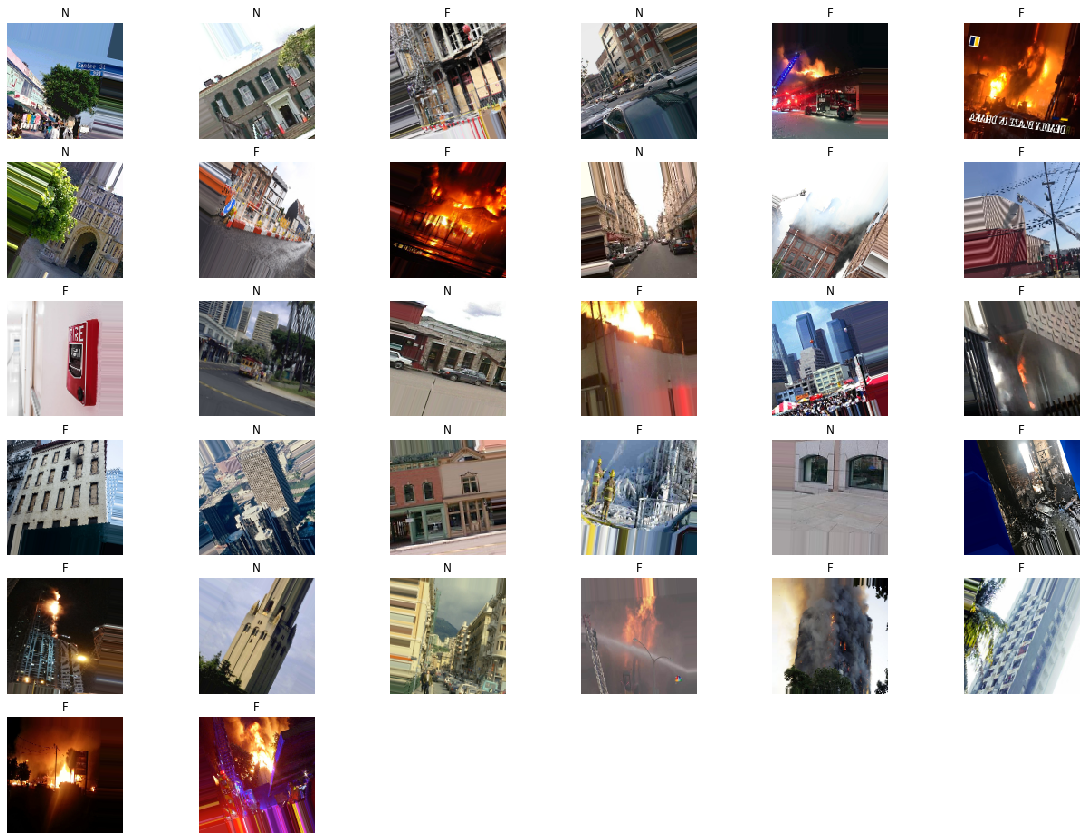

In [6]:
def show_batch(image_batch, label_batch):
  plt.figure(figsize=(20,20))
  for n in range(BATCH_SIZE):
      ax = plt.subplot(8, 6,n+1)
      plt.imshow(image_batch[n])
      plt.title(CLASS_NAMES[label_batch[n]==1][0].title())
      plt.axis('off')
        
# Display the first batch        
image_batch, label_batch = next(train_images)
show_batch(image_batch, label_batch)

In [7]:
print(f'Loaded {BATCH_SIZE * (len(train_images) - 1) + len(train_images[len(train_images) - 1][0])} images')
print(f'Created {len(train_images)} batches')

Loaded 1836 images
Created 58 batches


In [10]:
class CNN:
    def __init__(self):
        self.model = Sequential()
        self.input_shape = IMAGE_SIZE + (3,)
        chanDim = -1
        
        #CONV => RELU => POOL
        self.model.add(SeparableConv2D(32, (3, 3), padding="same"))
        self.model.add(Activation("relu"))
        self.model.add(BatchNormalization(axis=chanDim))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # (CONV => RELU) * 2 => POOL
        self.model.add(SeparableConv2D(64, (3, 3), padding="same"))
        self.model.add(Activation("relu"))
        self.model.add(BatchNormalization(axis=chanDim))
        self.model.add(SeparableConv2D(64, (3, 3), padding="same"))
        self.model.add(Activation("relu"))
        self.model.add(BatchNormalization(axis=chanDim))
        self.model.add(MaxPooling2D(pool_size=(2, 2)))
        
        # first set of FC => RELU layers
        self.model.add(Flatten())
        self.model.add(Dense(128))
        self.model.add(Activation("relu"))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.5))
        
        # second set of FC => RELU layers
        self.model.add(Dense(128))
        self.model.add(Activation("relu"))
        self.model.add(BatchNormalization())
        self.model.add(Dropout(0.5))
        
        self.model.add(Dense(1, activation="sigmoid"))
        
        opt = optimizers.SGD(learning_rate=1e-4)
        
        self.model.compile(optimizer=opt, loss="binary_crossentropy", metrics=["accuracy"])

In [11]:
cnn = CNN()

H = cnn.model.fit_generator(
    train_images,
    steps_per_epoch=train_images.samples // BATCH_SIZE,
    epochs=EPOCHS,
    verbose=1,
    validation_data = validation_images, 
    validation_steps = validation_images.samples // BATCH_SIZE
)

  ...
    to  
  ['...']
Train for 57 steps, validate for 24 steps
Epoch 1/50
57/57 [==============================] - 68s 1s/step - loss: 0.9567 - accuracy: 0.5460 - val_loss: 0.7726 - val_accuracy: 0.4648
Epoch 2/50
57/57 [==============================] - 69s 1s/step - loss: 0.8645 - accuracy: 0.6064 - val_loss: 0.8998 - val_accuracy: 0.4648
Epoch 3/50
57/57 [==============================] - 68s 1s/step - loss: 0.8160 - accuracy: 0.6214 - val_loss: 1.0035 - val_accuracy: 0.4648
Epoch 4/50
57/57 [==============================] - 68s 1s/step - loss: 0.7790 - accuracy: 0.6524 - val_loss: 1.1145 - val_accuracy: 0.4648
Epoch 5/50
57/57 [==============================] - 70s 1s/step - loss: 0.7683 - accuracy: 0.6563 - val_loss: 1.2435 - val_accuracy: 0.4648
Epoch 6/50
57/57 [==============================] - 69s 1s/step - loss: 0.7950 - accuracy: 0.6452 - val_loss: 1.2876 - val_accuracy: 0.4648
Epoch 7/50
57/57 [==============================] - 68s 1s/step - loss: 0.7849 - accuracy: 0.

{'loss': [0.9591439543436477, 0.8698541124882032, 0.816287402170989, 0.7740024878021883, 0.760955316528777, 0.7891209910555583, 0.7867110945168726, 0.7186796547568294, 0.6822819144128431, 0.7233733885039776, 0.693099657077747, 0.6963075131772627, 0.7157569863315167, 0.6951701185127055, 0.6700727156551344, 0.704741628629934, 0.6654520122016349, 0.6514919905070455, 0.6736581188083488, 0.6544206131852651, 0.6599559238110307, 0.6470260487956112, 0.6255330004607494, 0.6202590431183774, 0.6779891996584552, 0.6511990775554514, 0.6325690215680657, 0.6387543309554292, 0.607519266280261, 0.6415641133378192, 0.5928852108788332, 0.6247664964912736, 0.6399085993513035, 0.630046474034929, 0.6388971900067678, 0.6214544020444485, 0.6364702093363337, 0.6138674519014464, 0.6230214878487217, 0.5843951263673554, 0.6197331765802895, 0.614536448487157, 0.6150001812139795, 0.5738206385508874, 0.6015951100183432, 0.597512606704843, 0.5839648770122994, 0.5772946872097954, 0.5897392312729702, 0.5886314978488533

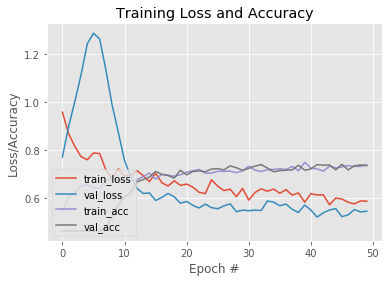

In [12]:
print(H.history)
N = np.arange(0, EPOCHS)
plt.style.use("ggplot")
plt.figure()
plt.plot(N, H.history["loss"], label="train_loss")
plt.plot(N, H.history["val_loss"], label="val_loss")
plt.plot(N, H.history["accuracy"], label="train_acc")
plt.plot(N, H.history["val_accuracy"], label="val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="lower left")
#plt.savefig(config.TRAINING_PLOT_PATH)